<a href="https://colab.research.google.com/github/Pedrohmflima/Limpeza-e-Tratamento-de-Dados-com-Python/blob/main/Limpeza_e_Tratamento_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1ª Etapa: Preparação/Visualização do Dataset**

In [ ]:
import pandas as pd
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as srn
%matplotlib inline

In [ ]:
#abrir e visualizar o dataset
dataset = pd.read_csv('Churn.csv', sep = ';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
#tamanho
dataset.shape

(999, 12)

In [ ]:
#1º Colunas estão sem um nome definido
#Dar os nomes as colunas
dataset.columns = ['Id','Score','Estado','Genero','Idade','Patrimonio','Saldo','Produtos','TemCartCredito','Ativo','Salario','Saiu' ]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
#Caso os valores da coluna esteja abaixo no dataframe
#df = pd.read_csv('dataset.csv',header=1)
#Isso pode ajudar no tratamento de dados pulando a primeira linha, pode-se usar também o comando skiprows = 1

1) Regras de Negócios e Universais

É importante sempre saber as regras de negócio da empresa a qual estamos trabalhando seus dados. Bem como, as regras universais.
Exemplo de Regra de Negócio: Uma empresa onde os Estados são apenas os da região Sul (RS,SC e PR)
Exemplo de Regra Universal: Idade não pode assumir um valor negativo

2) Achar os valores faltantes e preenche-los

Geralmente utilizamos a mediana para substituir os valores numéricos faltantes
e a moda para valores categóricos



In [ ]:
#Iniciar uma análise exploratória nos dados numéricos e em seguida nos categóricos, para ir na segunda etapa que é o tratamento desses dados

**2ª ETAPA ANÁLISE EXPLORATÓRIA**

#Explorar Dados Categóricos

#Visualização groupby() + size
#Visualização Gráfica --> plot.bar()

In [ ]:
#Explorar Dados Categóricos

#Visualização groupby() + size
#Visualização Gráfica --> plot.bar()

In [ ]:
#Estado
#Agrupar por estado e ve sua ocorrencia utilizando group by e size --> MODA: RS
agrupado = dataset.groupby(['Estado']).size() #size = tamanho
agrupado
#Observa-se que RP, SP e TD foge da regra de negócio (Estados da região Sul)
#Correção: Substituir os dados errados pela MODA que é RS

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

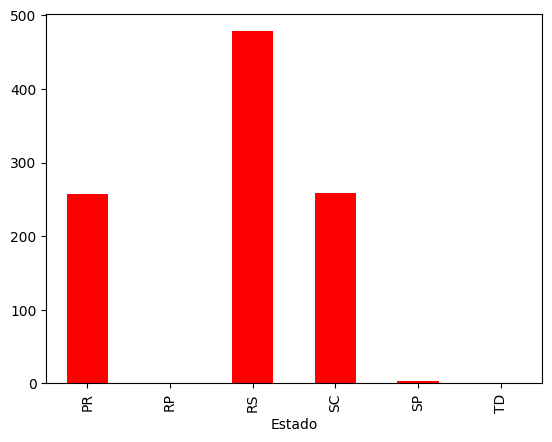

In [ ]:
#Visualização por gráfico
agrupado.plot.bar(color = 'red')

In [ ]:
#Genero
#Groupby + size --> Descobrir os possiveis erros
Agrupado = dataset.groupby(['Genero']).size()
Agrupado
#Dados não estão distribuidos de maneira homogenea. Nesse Caso, não se pode subsitutir pela Moda, pois os dados estão certos

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

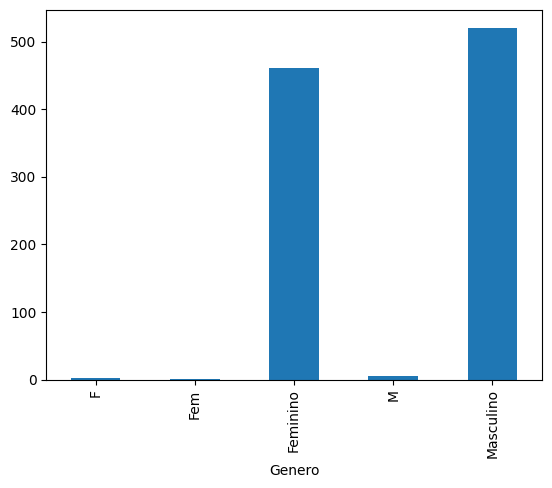

In [ ]:
#Visualização Gráfica
Agrupado.plot.bar()

#Explorar Colunas Numéricos

#Visualização estatistica .describe()
#Visualização gráfica --> boxplot(), hist()

In [ ]:
#Explorar Colunas Numéricos

#Visualização estatistica .describe()
#Visualização gráfica --> boxplot(), hist()

In [ ]:
#Score
#Visualização Estatistica
#Com describe() conseguimos analisar os valores estatisticos de uma coluna numérica
dataset['Score'].describe()
#Media e Média com valores próximos é um indico de que não existe grandes outliers

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

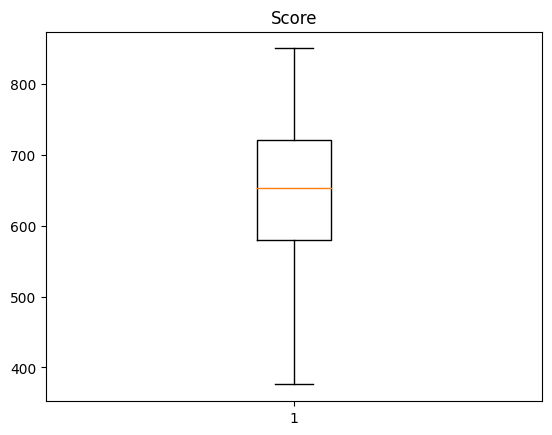

In [ ]:
#Visualização Gráfica

# Criar o boxplot e adicionar título
plt.boxplot(dataset['Score'])
plt.title('Score')
# Exibir o gráfico
plt.show()

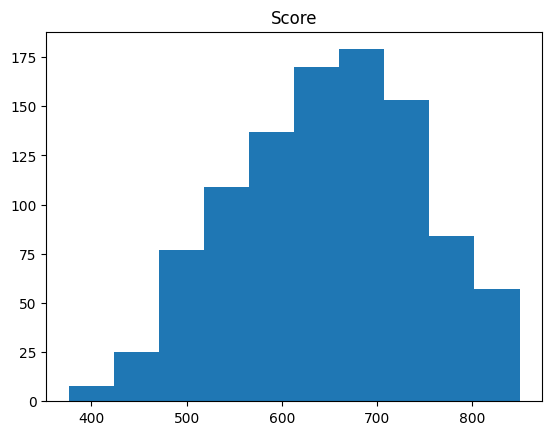

In [ ]:
#Criar um Histograma
plt.hist(dataset['Score'])
plt.title('Score')
# Exibir o gráfico
plt.show()

In [ ]:
#Idade
#Visualização Estatistica
dataset['Idade'].describe()
#Observamos alguns erros como: idade negativa e idade máxima de 140 anos
#Como a média e a mediana estão próximos devem ter pouco desses outliers

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

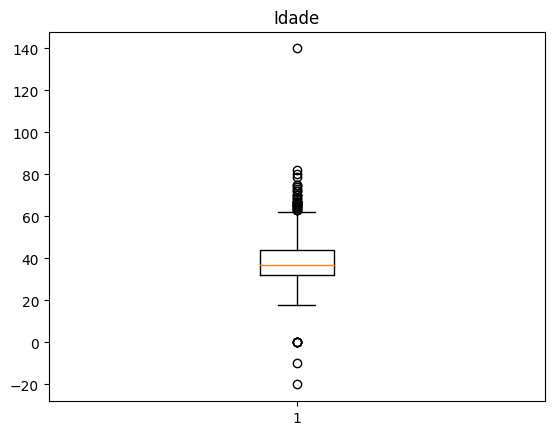

In [ ]:
#Visualização Gráfica
#boxplot
plt.boxplot(dataset['Idade'])
plt.title('Idade')
plt.show()

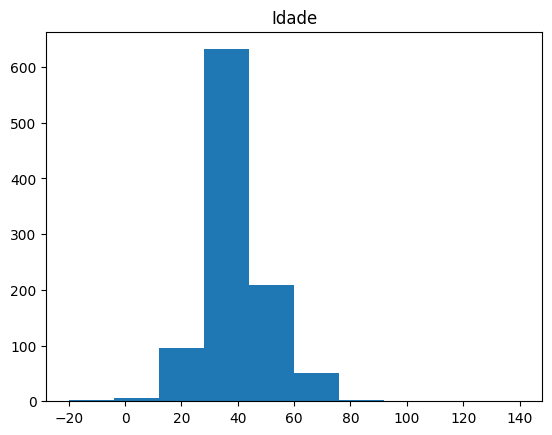

In [ ]:
#Visualização Gráfica
#histograma
plt.hist(dataset['Idade'])
plt.title('Idade')
plt.show()

In [ ]:
#Saldo
#Visualização Estatistica
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

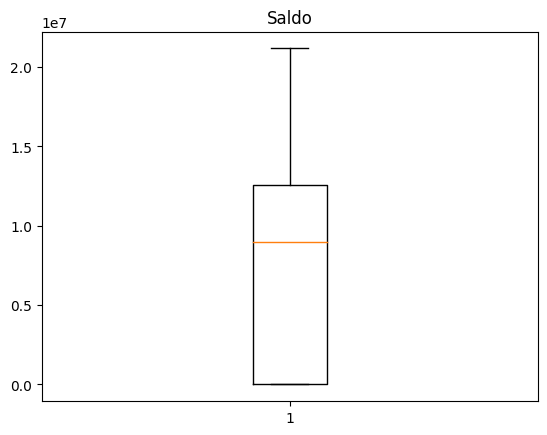

In [ ]:
#Visualização Gráfica
#Boxplot
plt.boxplot(dataset['Saldo'])
plt.title('Saldo')
plt.show()

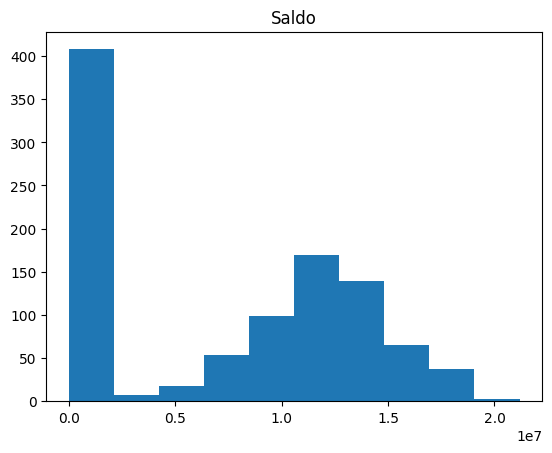

In [ ]:
#Histograma
plt.hist(dataset['Saldo'])
plt.title('Saldo')
plt.show()
#Analisa que tem muita gente com zero de saldo

In [ ]:
#Salário
#Visualização Estatistica
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salário')

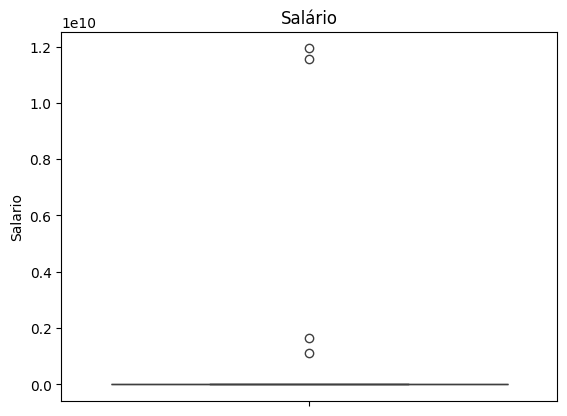

In [ ]:
#Visualização Gráfica
#Boxplot - Com Seaborn
srn.boxplot(dataset['Salario']).set_title('Salário')
#Grande concentração no zero e alguns valores outliers no gráfico
#Podemos remover os outliers e substitui-los pela mediana

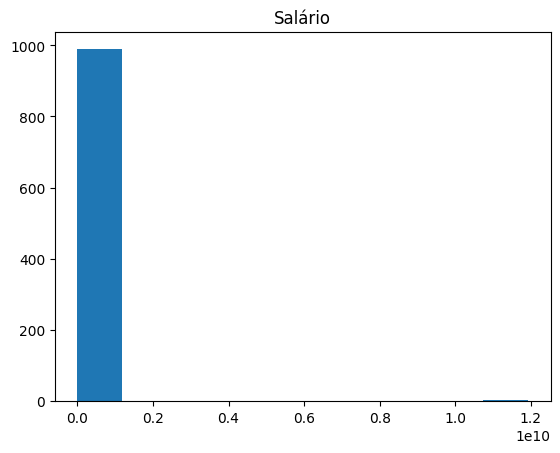

In [ ]:
#Histograma
plt.hist(dataset['Salario'])
plt.title('Salário')
plt.show()

#Valores NAN

In [ ]:
#Contamos os valores NaN
dataset.isnull().sum()

#Observa-se que Genero e Salario possuem valores NaN

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

#Tratamento dos Dados

In [ ]:
#Salário
#Problema identificado: Substituir os NaN pela mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [ ]:
#mediana
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [ ]:
#Substituir NaN pela mediana
dataset['Salario'].fillna(mediana, inplace = True)

In [ ]:
#Verificar se ainda existe valores NaN na coluna Salario
dataset['Salario'].isnull().sum()

0

In [ ]:
#Genero
#Problemas identificados: Substituir os valores NaN pela Mediana, falta de padronização nas variáveis
agrupado = dataset.groupby(dataset['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [ ]:
#Verificar o total de NaN
dataset['Genero'].isnull().sum()

8

In [ ]:
#Preencher os NaN pela moda (Masculino)
dataset.fillna('Masculino',inplace = True)

In [ ]:
#Verificar o total de NaN
dataset['Genero'].isnull().sum()

0

In [ ]:
#Padronização de acordo com o dominio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['F','Fem']), 'Genero'] = 'Feminino'

In [ ]:
#Visualizar o resultado
dataset.groupby('Genero').size()

Genero
Feminino     464
Masculino    535
dtype: int64

In [ ]:
#Idade
#Problema identificado: Idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [ ]:
#Visualizar quantas colunas estão fora do dominio
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [ ]:
#Calcular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [ ]:
#Substituir os valores fora do dominio pela mediana
dataset.loc[(dataset['Idade'] < 0 )| (dataset['Idade'] > 120), 'Idade'] = mediana

In [ ]:
#Visualizar quantas colunas estão fora do dominio
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


ERRO GERAL E COMUM: DADOS DUPLICADOS --> Buscar pelo ID

In [ ]:
#Visualizaçã dos dados duplicados do dataset
dataset[dataset.duplicated(['Id'],keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
#Excluimos pelo Id
dataset.drop_duplicates(subset='Id',keep = 'first',inplace = True)

In [ ]:
#Visualizar Duplicadas
dataset[dataset.duplicated(subset = 'Id',keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#Estado
#Erros Identificados: Estado fora do dominio --> TD,SP,RP

In [ ]:
#Visualizar os Estados fora do dominio
dataset.groupby(dataset['Estado']).size()

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [ ]:
#Substituir os Estados fora do dominio pela moda
dataset.loc[dataset['Estado'].isin(['TD','SP','RP']),'Estado'] = sts.mode(dataset['Estado'])

In [ ]:
#Visualizar
agrupado = dataset.groupby(dataset['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [ ]:
#Salario --> Tratamento de Outliers, vamos utilizar 2 desvios padrão se o salário for maior que 2 desv. padrão
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [ ]:
#Visualizar se existe salário maior que 2 * desvio padrão
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
#Mediana
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [ ]:
#Substituir os outliers pela mediana
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

In [ ]:
#Visualizar se existe salário maior que 2 * desvio padrão
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.shape

(998, 12)

#Exercicios Extras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Tratar dados tempo.csv
#Aparencia = Sol,Nublado,Chuva
#Temperatura = -130 ~ 130
#Umidade = 0 ~ 100
#Jogar = sim/nao
#Tratar Valores NaN

In [ ]:
import pandas as pd
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as srn

In [ ]:
dataset = pd.read_csv('tempo.csv', sep = ';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
dataset.shape

(14, 5)

In [ ]:
#Valores NaN
dataset.isnull().sum()
#Umidade e Vento possuem valores nulos

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [ ]:
#Dados Categóricos
#Aparencia
agrupado = dataset.groupby(dataset['Aparencia']).size()
agrupado
#dados fora do dominio (menos)

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
#Moda
moda = sts.mode(dataset['Aparencia'])
moda

'sol'

In [ ]:
#Tratando os dados, subsituindo os valores fora do dominio pela moda
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = moda

In [ ]:
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
#Dado Numérico
#Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

<Axes: ylabel='Temperatura'>

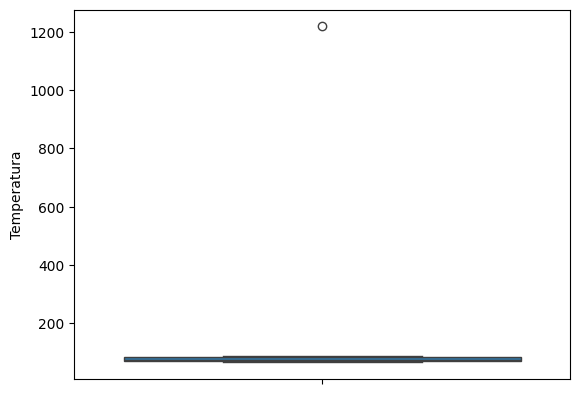

In [ ]:
#Visualização Gráfica
srn.boxplot(dataset['Temperatura'])

In [ ]:
#Visualizar erro de dominio
dataset.loc[(dataset['Temperatura'] <= -130) | (dataset['Temperatura'] >= 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
#Mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [ ]:
#Substituindo o erro de dominio pela mediana
dataset.loc[(dataset['Temperatura'] <= -130) | (dataset['Temperatura'] >= 130), 'Temperatura'] = mediana

In [ ]:
#Visualizar dominio
dataset.loc[(dataset['Temperatura'] <= -130) | (dataset['Temperatura'] >= 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [ ]:
#Dado Numérico
#Umidade
#Erros: Valores Nan e valores fora do dominio

In [ ]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [ ]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [ ]:
#Tratando os valores NaN
dataset['Umidade'].fillna(mediana,inplace = True)

In [ ]:
dataset['Umidade'].describe()

count     14.000000
mean      89.464286
std       33.204763
min       65.000000
25%       71.250000
50%       85.250000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [ ]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [ ]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [ ]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dataset['Umidade'].describe()

count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [ ]:
#Tratar dados tempo.csv
#Aparencia = Sol,Nublado,Chuva
#Temperatura = -130 ~ 130
#Umidade = 0 ~ 100
#Jogar = sim/nao
#Tratar Valores NaN

In [ ]:
#Jogar
#Dado Categórico
#Aparentemente Tranquilo
dataset.groupby(dataset['Jogar']).size()

Jogar
nao    5
sim    9
dtype: int64

In [ ]:
#Vento
#Dado Categórico
#Erro: Substituir valores NaN pela moda
dataset.groupby(dataset['Vento']).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
#moda
moda = sts.mode(dataset['Vento'])
moda

'FALSO'

In [ ]:
dataset['Vento'].isnull().sum()

1

In [ ]:
dataset['Vento'].fillna(moda,inplace = True)

In [ ]:
dataset['Vento'].isnull().sum()

0

In [ ]:
dataset.shape

(14, 5)

In [ ]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
